### Panic Attack Frequency Analysis Across Age Groups

#### Load and Preveiw the Dataset

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

● Making variable and taking dataset

In [23]:
data = pd.read_csv("panic_attack_dataset.csv")

● Checking the heading of the data

In [24]:
print(data.head())

   ID  Age      Gender  Panic_Attack_Frequency  Duration_Minutes   Trigger  \
0   1   56      Female                       9                 5  Caffeine   
1   2   46        Male                       8                 9    Stress   
2   3   32      Female                       6                31      PTSD   
3   4   60        Male                       5                20  Caffeine   
4   5   25  Non-binary                       6                10  Caffeine   

  Chest_Pain Medical_History  Caffeine_Intake  Exercise_Frequency  \
0        Yes         Anxiety                2                   3   
1         No            PTSD                2                   5   
2         No      Depression                4                   0   
3         No      Depression                3                   3   
4        Yes      Depression                3                   6   

   Sleep_Hours  Alcohol_Consumption Smoking  Panic_Score  
0          6.4                    5     Yes            5 

● Checking all the data types and data values

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Chest_Pain              1200 non-null   object 
 7   Medical_History         1078 non-null   object 
 8   Caffeine_Intake         1200 non-null   int64  
 9   Exercise_Frequency      1200 non-null   int64  
 10  Sleep_Hours             1200 non-null   float64
 11  Alcohol_Consumption     1200 non-null   int64  
 12  Smoking                 1200 non-null   object 
 13  Panic_Score             1200 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memor

#### Understand the Dataset

● Find out the number of rows and columns

In [26]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 1200 rows and 14 columns.


● Identify columns with missing values and their counts

In [27]:
print(data.isnull().sum())

ID                          0
Age                         0
Gender                      0
Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Chest_Pain                  0
Medical_History           122
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Panic_Score                 0
dtype: int64


● Get statistical summaries for numerical columns

In [28]:
print(data.describe())

                ID          Age  Panic_Attack_Frequency  Duration_Minutes  \
count  1200.000000  1200.000000             1200.000000        1200.00000   
mean    600.500000    41.134167                4.412500          24.39250   
std     346.554469    13.543412                2.847648          11.39993   
min       1.000000    18.000000                0.000000           5.00000   
25%     300.750000    29.000000                2.000000          15.00000   
50%     600.500000    42.000000                4.000000          24.00000   
75%     900.250000    53.000000                7.000000          34.00000   
max    1200.000000    64.000000                9.000000          44.00000   

       Caffeine_Intake  Exercise_Frequency  Sleep_Hours  Alcohol_Consumption  \
count      1200.000000         1200.000000  1200.000000          1200.000000   
mean          2.539167            2.955000     6.481583             4.416667   
std           1.716854            2.061516     1.405625           

#### Clean the Data

● Decide how to handle missing data

In [29]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

● Ensure column names are descriptive and easy to use.

In [30]:
data.rename(columns={"old_column": "new_column"}, inplace=True)

● Ensure data types match the content

In [31]:
if 'date_column' not in data.columns:
	data['date_column'] = pd.to_datetime('2023-01-01')
data['date_column'] = pd.to_datetime(data['date_column'])

#### Explore and Analyze the Data

● Explore categorical data for unique values

In [32]:
print(data['Gender'].unique())

['Female' 'Male' 'Non-binary']


● Group data to find trends or calculate aggregates

In [33]:
print(data.groupby('Gender')['Panic_Score'].mean())

Gender
Female        5.632058
Male          5.534451
Non-binary    5.429825
Name: Panic_Score, dtype: float64


● Check correlations between numerical columns

● Visualize relationships between pairs of numerical variables

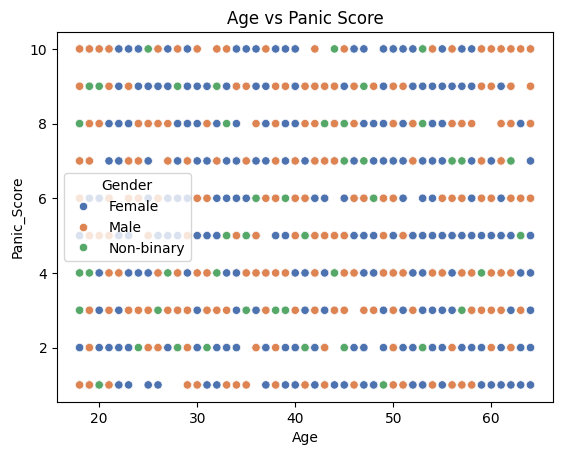

In [34]:
sns.scatterplot(x='Age', y='Panic_Score', data=data, hue='Gender', palette='deep')
plt.title('Age vs Panic Score')
plt.show()

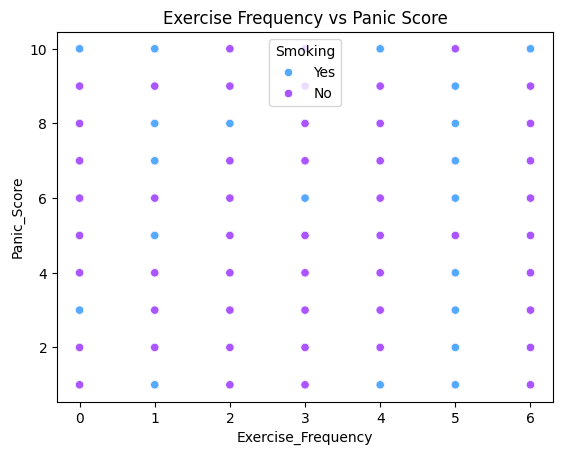

In [35]:
sns.scatterplot(x='Exercise_Frequency', y='Panic_Score', data=data, hue='Smoking', palette='cool')
plt.title('Exercise Frequency vs Panic Score')
plt.show()

#### 5. Visualize the Data

##### Filter the Dataset for Age Below 35

In [36]:
data_below_35 = data[data['Age'] < 35]

● Panic Attacks by Gender

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\1997269586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_below_35, palette='viridis')


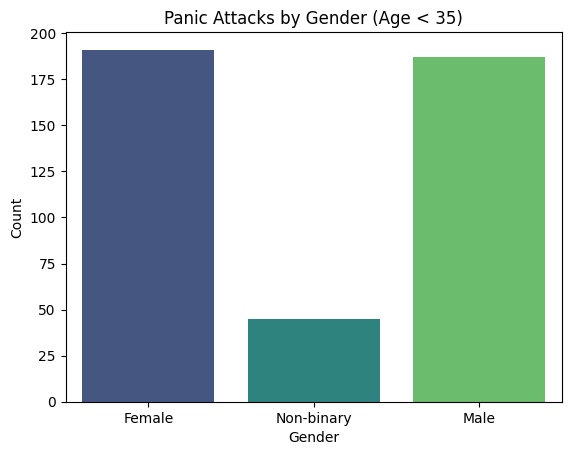

In [37]:
sns.countplot(x='Gender', data=data_below_35, palette='viridis')
plt.title('Panic Attacks by Gender (Age < 35)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

● Most Common Mental Issues

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\1632989580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medical_history_counts_below_35.index, y=medical_history_counts_below_35.values, palette='cool', )


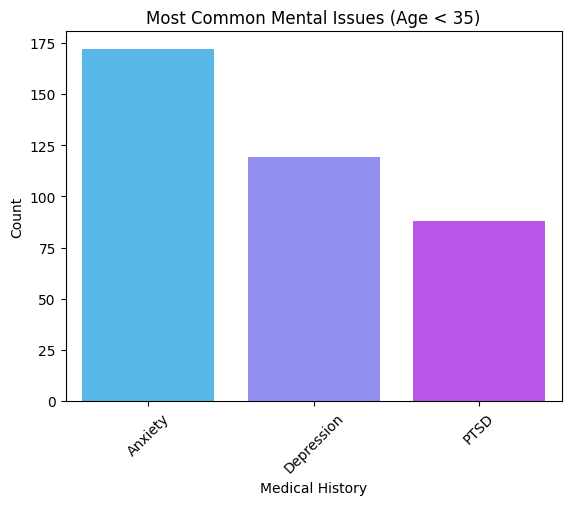

In [38]:
medical_history_counts_below_35 = data_below_35['Medical_History'].value_counts()

sns.barplot(x=medical_history_counts_below_35.index, y=medical_history_counts_below_35.values, palette='cool', )
plt.title('Most Common Mental Issues (Age < 35)')
plt.xlabel('Medical History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

● High Caffeine Intake and Panic Attack Frequency

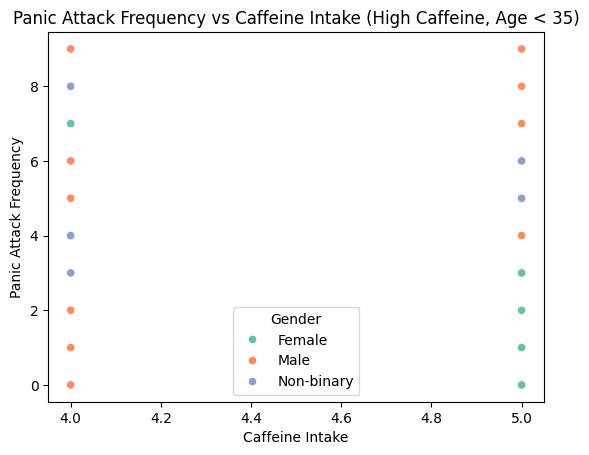

In [39]:
high_caffeine_below_35 = data_below_35[data_below_35['Caffeine_Intake'] > 3]

sns.scatterplot(x='Caffeine_Intake', y='Panic_Attack_Frequency', data=high_caffeine_below_35, hue='Gender', palette='Set2')
plt.title('Panic Attack Frequency vs Caffeine Intake (High Caffeine, Age < 35)')
plt.xlabel('Caffeine Intake')
plt.ylabel('Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Exercise Frequency

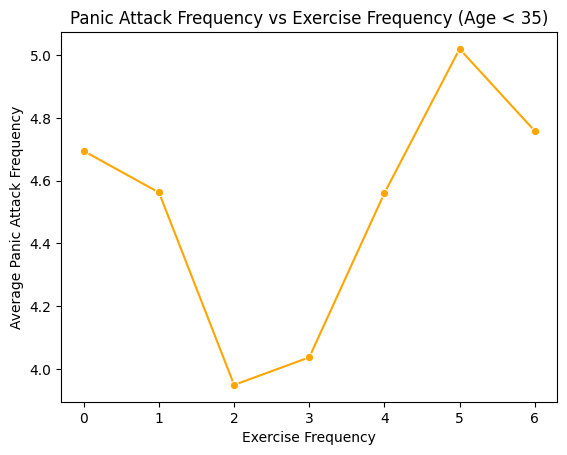

In [40]:
exercise_group_below_35 = data_below_35.groupby('Exercise_Frequency')['Panic_Attack_Frequency'].mean().reset_index()
sns.lineplot(x='Exercise_Frequency', y='Panic_Attack_Frequency', data=exercise_group_below_35, marker='o', color='orange')
plt.title('Panic Attack Frequency vs Exercise Frequency (Age < 35)')
plt.xlabel('Exercise Frequency')
plt.ylabel('Average Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Sleep Hours

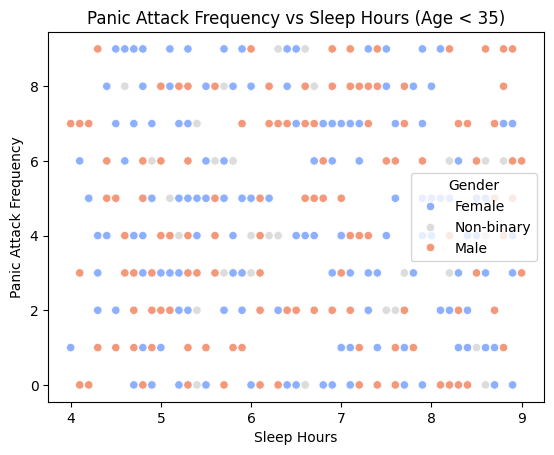

In [41]:
sns.scatterplot(x='Sleep_Hours', y='Panic_Attack_Frequency', data=data_below_35, hue='Gender', palette='coolwarm')
plt.title('Panic Attack Frequency vs Sleep Hours (Age < 35)')
plt.xlabel('Sleep Hours')
plt.ylabel('Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Alcohol Consumption

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\3360230507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Alcohol_Consumption', y='Panic_Attack_Frequency', data=alcohol_group_below_35, palette='magma')


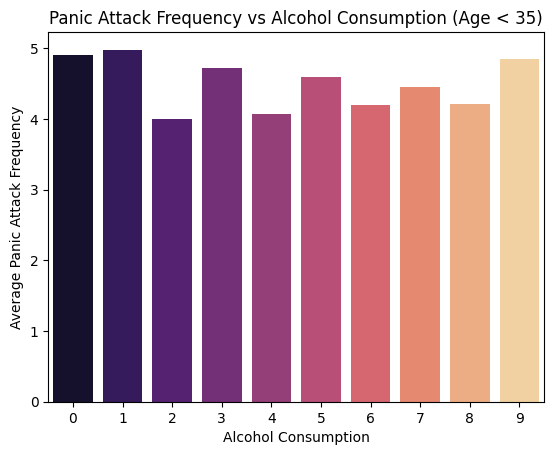

In [42]:
alcohol_group_below_35 = data_below_35.groupby('Alcohol_Consumption')['Panic_Attack_Frequency'].mean().reset_index()
sns.barplot(x='Alcohol_Consumption', y='Panic_Attack_Frequency', data=alcohol_group_below_35, palette='magma')
plt.title('Panic Attack Frequency vs Alcohol Consumption (Age < 35)')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Average Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Smoking Status

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\373042155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Smoking', y='Panic_Attack_Frequency', data=smoking_group_below_35, palette='Set3')


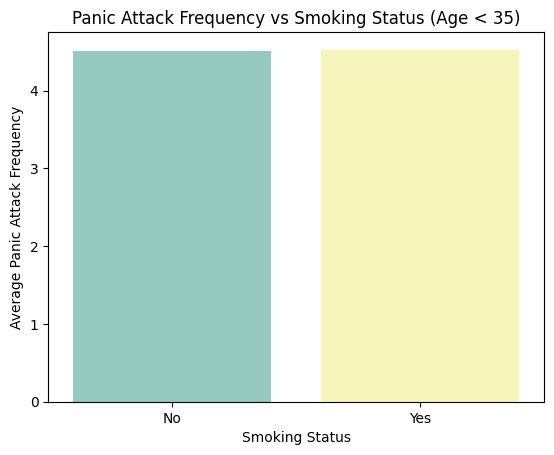

In [43]:
smoking_group_below_35 = data_below_35.groupby('Smoking')['Panic_Attack_Frequency'].mean().reset_index()
sns.barplot(x='Smoking', y='Panic_Attack_Frequency', data=smoking_group_below_35, palette='Set3')
plt.title('Panic Attack Frequency vs Smoking Status (Age < 35)')
plt.xlabel('Smoking Status')
plt.ylabel('Average Panic Attack Frequency')
plt.show()

#### ● Filter for individuals aged above 35

In [44]:
data_filtered = data[data['Age'] > 35]

● Panic Attacks by Gender (Age > 35)

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\83528967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_filtered, palette='viridis')


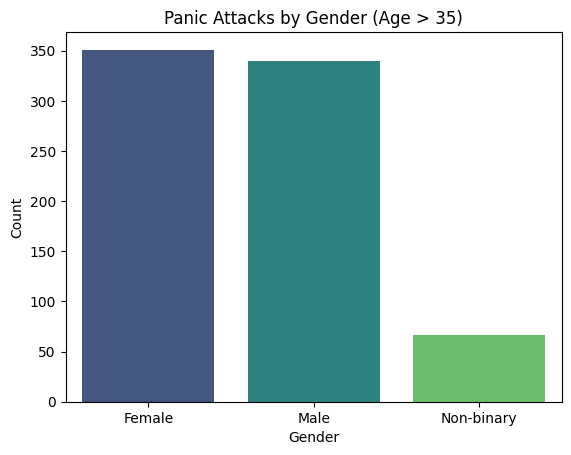

In [45]:
Gender_counts = data_filtered['Gender'].value_counts()

sns.countplot(x='Gender', data=data_filtered, palette='viridis')
plt.title('Panic Attacks by Gender (Age > 35)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

● Most Common Medical History

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\3540231447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medical_history_counts.index, y=medical_history_counts.values, palette='cool')


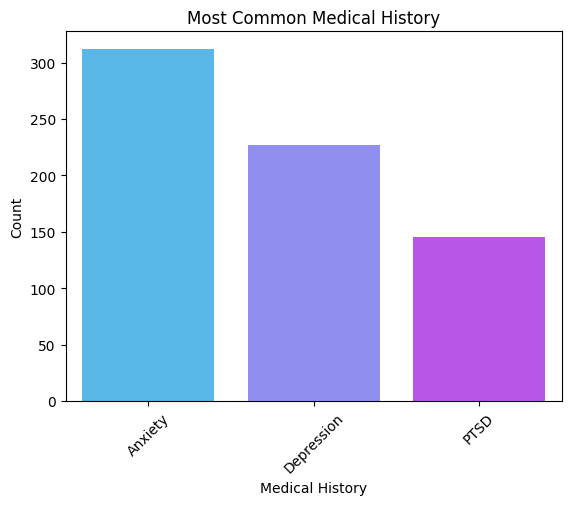

In [46]:
medical_history_counts = data_filtered['Medical_History'].value_counts()

sns.barplot(x=medical_history_counts.index, y=medical_history_counts.values, palette='cool')
plt.title('Most Common Medical History')
plt.xlabel('Medical History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

● High Caffeine Intake and Panic Attack Frequency

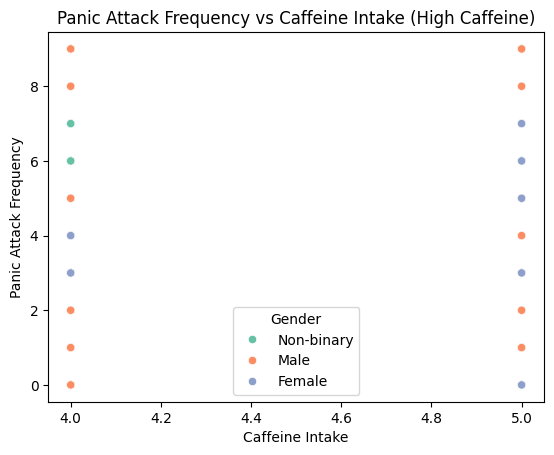

In [47]:
high_caffeine = data_filtered[data_filtered['Caffeine_Intake'] > 3]

sns.scatterplot(x='Caffeine_Intake', y='Panic_Attack_Frequency', data=high_caffeine, hue='Gender', palette='Set2')
plt.title('Panic Attack Frequency vs Caffeine Intake (High Caffeine)')
plt.xlabel('Caffeine Intake')
plt.ylabel('Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Exercise Frequency

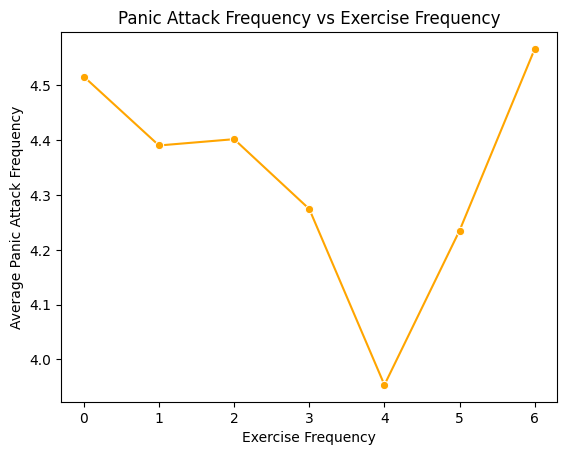

In [48]:
exercise_group = data_filtered.groupby('Exercise_Frequency')['Panic_Attack_Frequency'].mean().reset_index()
sns.lineplot(x='Exercise_Frequency', y='Panic_Attack_Frequency', data=exercise_group, marker='o', color='orange')
plt.title('Panic Attack Frequency vs Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Average Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Sleep Hours

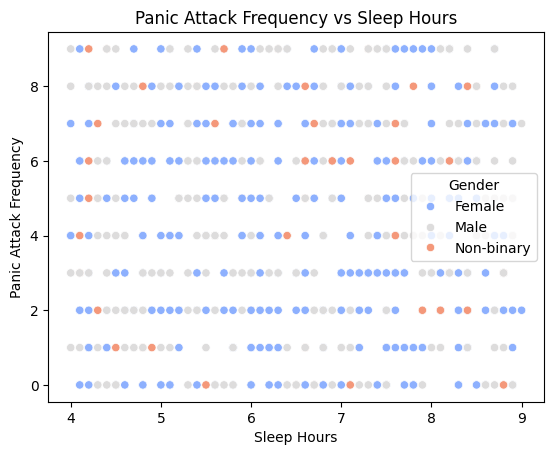

In [49]:
sns.scatterplot(x='Sleep_Hours', y='Panic_Attack_Frequency', data=data_filtered, hue='Gender', palette='coolwarm')
plt.title('Panic Attack Frequency vs Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Alcohol Consumption

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\1505552781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Alcohol_Consumption', y='Panic_Attack_Frequency', data=alcohol_group, palette='magma')


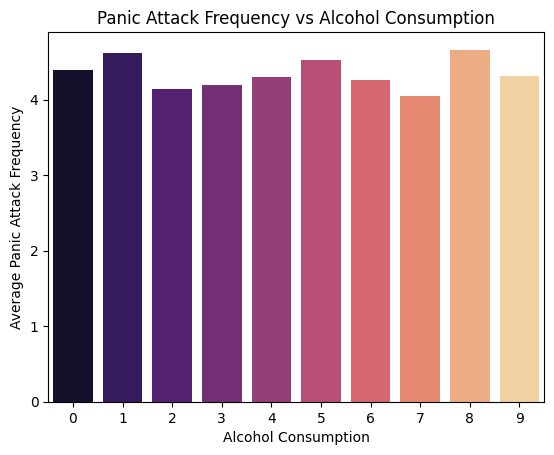

In [50]:
alcohol_group = data_filtered.groupby('Alcohol_Consumption')['Panic_Attack_Frequency'].mean().reset_index()
sns.barplot(x='Alcohol_Consumption', y='Panic_Attack_Frequency', data=alcohol_group, palette='magma')
plt.title('Panic Attack Frequency vs Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Average Panic Attack Frequency')
plt.show()

● Panic Attack Frequency vs Smoking Status

C:\Users\Janith Chathuranga\AppData\Local\Temp\ipykernel_61236\4097638464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Smoking', y='Panic_Attack_Frequency', data=smoking_group, palette='Set3')


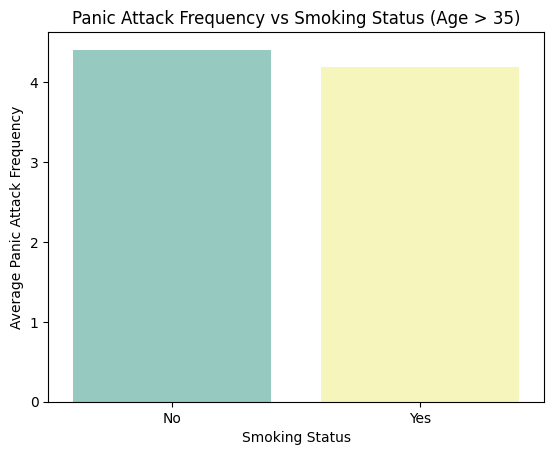

In [51]:
smoking_group = data_filtered.groupby('Smoking')['Panic_Attack_Frequency'].mean().reset_index()
sns.barplot(x='Smoking', y='Panic_Attack_Frequency', data=smoking_group, palette='Set3')
plt.title('Panic Attack Frequency vs Smoking Status (Age > 35)')
plt.xlabel('Smoking Status')
plt.ylabel('Average Panic Attack Frequency')
plt.show()